<a href="https://colab.research.google.com/github/joyce-huang/JSC270_Assg2/blob/joyce-huang-branch/Assignment2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
import statsmodels.formula.api as smf

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [49]:
income94 = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data', header=None)
income94.columns = ['age','workclass', 'fnlwgt','education','education_num','marital_status','occupation',
                    'relationship','race','sex','capital_gain','capital_loss','hours_per_week','native_country','gross_income_group']

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,gross_income_group
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


##Initial Data Exploration

###Question 1

In [30]:
income94.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   age                 32561 non-null  int64 
 1   workclass           32561 non-null  object
 2   fnlwgt              32561 non-null  int64 
 3   education           32561 non-null  object
 4   education_num       32561 non-null  int64 
 5   marital_status      32561 non-null  object
 6   occupation          32561 non-null  object
 7   relationship        32561 non-null  object
 8   race                32561 non-null  object
 9   sex                 32561 non-null  object
 10  capital_gain        32561 non-null  int64 
 11  capital_loss        32561 non-null  int64 
 12  hours_per_week      32561 non-null  int64 
 13  native_country      32561 non-null  object
 14  gross_income_group  32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


From a brief glance at the values in the table, they do seem to match the data types given in the adult.names text file. The column gross_income_group does not appear in the data types at the bottom of adult.names, but the file states that the income was discretized to two groups, >50K and <= 50K, which is contained in the gross_income_group column.

###Question 2

The adult.names text file specifies that any unknown values were set to "?".

In [36]:
income94 = income94.replace(" ?", np.NaN)
income94.isnull().sum()

age                      0
workclass             1836
fnlwgt                   0
education                0
education_num            0
marital_status           0
occupation            1843
relationship             0
race                     0
sex                      0
capital_gain             0
capital_loss             0
hours_per_week           0
native_country         583
gross_income_group       0
dtype: int64

###Question 3

(array([3.0913e+04, 8.7800e+02, 1.5700e+02, 3.6000e+02, 3.8000e+01,
        4.9000e+01, 5.0000e+00, 0.0000e+00, 2.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.5900e+02]),
 array([    0.  ,  4999.95,  9999.9 , 14999.85, 19999.8 , 24999.75,
        29999.7 , 34999.65, 39999.6 , 44999.55, 49999.5 , 54999.45,
        59999.4 , 64999.35, 69999.3 , 74999.25, 79999.2 , 84999.15,
        89999.1 , 94999.05, 99999.  ]),
 <a list of 20 Patch objects>)

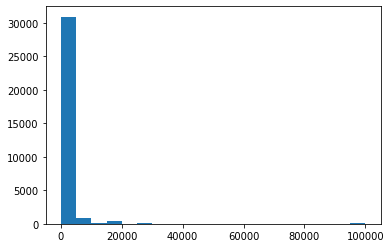

In [21]:
plt.hist(income94.capital_gain, bins = 20)

(array([3.1047e+04, 6.0000e+00, 1.5000e+01, 2.0000e+00, 8.0000e+00,
        1.3000e+01, 1.0500e+02, 3.5600e+02, 4.7500e+02, 3.0400e+02,
        1.1900e+02, 8.8000e+01, 1.2000e+01, 2.0000e+00, 0.0000e+00,
        0.0000e+00, 2.0000e+00, 4.0000e+00, 0.0000e+00, 3.0000e+00]),
 array([   0. ,  217.8,  435.6,  653.4,  871.2, 1089. , 1306.8, 1524.6,
        1742.4, 1960.2, 2178. , 2395.8, 2613.6, 2831.4, 3049.2, 3267. ,
        3484.8, 3702.6, 3920.4, 4138.2, 4356. ]),
 <a list of 20 Patch objects>)

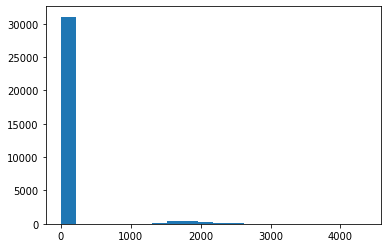

In [22]:
plt.hist(income94.capital_loss, bins = 20)

###Question 4

(array([4.4830e+03, 8.6340e+03, 1.0945e+04, 4.3820e+03, 2.5100e+03,
        9.8800e+02, 3.4100e+02, 1.3600e+02, 6.4000e+01, 3.8000e+01,
        1.5000e+01, 5.0000e+00, 5.0000e+00, 5.0000e+00, 2.0000e+00,
        3.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00, 2.0000e+00]),
 array([  12285.,   85906.,  159527.,  233148.,  306769.,  380390.,
         454011.,  527632.,  601253.,  674874.,  748495.,  822116.,
         895737.,  969358., 1042979., 1116600., 1190221., 1263842.,
        1337463., 1411084., 1484705.]),
 <a list of 20 Patch objects>)

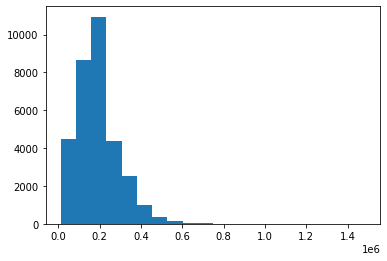

In [18]:
plt.hist(income94.fnlwgt, bins = 20)

The overall histogram of fnlwgt seems to be skewed to the right, and thus it is not symmetrically distributed.

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fc392b81550>,
      dtype=object)

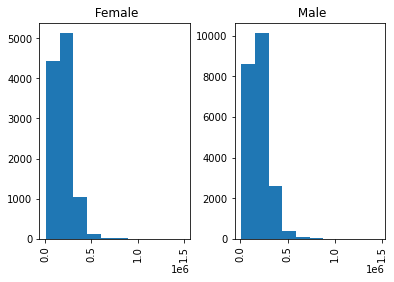

In [45]:
income94["fnlwgt"].hist(by=income94["sex"])

The shape of both female and male population appears to be skewed to the right, similar to the histogram of the overall population. However, the values y-axis of the female histogram are half that of the values of the male histogram.

Regarding outliers, the fnlwgt variable is meant to allow groups that are less represented in the dataset to have a more equal representation in calculations. Thus, it seems wrong to remove outliers from this variable, as they would most likely be data points that were weighted higher, and thus are from demographics that are less represented in the overall dataset. By removing the outliers, we risk removing entire demographics from our analysis, as stated in the text description of adult.names, "People with similar demographic characteristics should have similar weights."

##Correlation

In [38]:
df = income94[["age", "education_num", "hours_per_week"]]
df.corr()

,age,education_num,hours_per_week
age,1.000000,0.036527,0.068756
education_num,0.036527,1.000000,0.148123
hours_per_week,0.068756,0.148123,1.000000


None of the variables seem strongly correlated. The highest correlation is between education_num and hours_per_week, at 0.14. However, that number is still quite small. Since it is the only value that is greater than |0.1|, it is the only one we will statistically test.

To test the correlation coefficient, we will perform a hypothesis test. Our null hypothesis is that education_num and hours_per_week have no relationship. Our alternate hypothesis is that there is a relationship between education_num and hours_per_week. We will use a significance level of 0.05.

In [47]:
stats.pearsonr(income94["education_num"], income94["hours_per_week"])

(0.1481227326229122, 4.2366474790836004e-159)

We can see that the p-value is much smaller than our significance level. Thus, we can reject the null hypothesis and state that education_num and hours_per_week do have a relationship. I'm not entirely certain what education_num or hours_per_week represent. Thus, I don't think I am equipped to determine whether or not this direction or significance is expected, as I don't actually know what the two variables are. I will say that the correlation seems very weak, so I was a bit surprised that the relationship was in fact significant.

In [69]:
income94_female = income94[income94["sex"] == " Female"]
stats.pearsonr(income94_female["education_num"], income94_female["hours_per_week"])

(0.1787490716478521, 4.96659881860534e-78)

In [70]:
income94_male = income94[income94["sex"] == " Male"]
stats.pearsonr(income94_male["education_num"], income94_male["hours_per_week"])

(0.13678240002850428, 1.7342523181609486e-91)

The correlation coefficients for both male and female participants are quite close to the correlation coefficient of the entire dataset, with women being slightly higher and men being slightly lower. The p-values differ as well, but they remain less than 0.05, so we can still reject the null hypothesis for both cases. None of this is unexpected.

In [79]:
income94["weighted_education_num"] = income94["education_num"] * income94["fnlwgt"]
income94["weighted_hours_per_week"] = income94["hours_per_week"] * income94["fnlwgt"]
income94[["education_num", "weighted_education_num", "hours_per_week", "weighted_hours_per_week"]].var()

education_num              6.618890e+00
weighted_education_num     1.390253e+12
hours_per_week             1.524590e+02
weighted_hours_per_week    2.450618e+13
dtype: float64

In the weighted version of each column, we can see that the variance is significantly larger.

In [80]:
income94[["education_num", "weighted_education_num", "hours_per_week", "weighted_hours_per_week"]].cov()

,education_num,weighted_education_num,hours_per_week,weighted_hours_per_week
education_num,6.618890e+00,1.178453e+06,4.705338e+00,4.066383e+05
weighted_education_num,1.178453e+06,1.390253e+12,6.343728e+05,4.558904e+12
hours_per_week,4.705338e+00,6.343728e+05,1.524590e+02,2.678528e+07
weighted_hours_per_week,4.066383e+05,4.558904e+12,2.678528e+07,2.450618e+13


Similarly, the weighted covariance between education_num and hours_per_week is significantly larger than the unweighted covariance. Since the variance and covariance increases in all weighted cases, this could mean that there are not many values that deviate far from the mean in the dataset. That would explain why when the weight of underrepresented groups is increased, the variance and covariance between education_num and hours_per_week increases.

##Regression

In [82]:
pd.get_dummies(income94, ["sex"])
#sns.regplot(data=income94, x="age", y="hours_per_week")

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,weighted_education_num,weighted_hours_per_week,sex_ ?,sex_ Federal-gov,sex_ Local-gov,sex_ Never-worked,sex_ Private,sex_ Self-emp-inc,sex_ Self-emp-not-inc,sex_ State-gov,sex_ Without-pay,sex_ 10th,sex_ 11th,sex_ 12th,sex_ 1st-4th,sex_ 5th-6th,sex_ 7th-8th,sex_ 9th,sex_ Assoc-acdm,sex_ Assoc-voc,sex_ Bachelors,sex_ Doctorate,sex_ HS-grad,sex_ Masters,sex_ Preschool,sex_ Prof-school,sex_ Some-college,sex_ Divorced,sex_ Married-AF-spouse,sex_ Married-civ-spouse,sex_ Married-spouse-absent,sex_ Never-married,sex_ Separated,sex_ Widowed,...,sex_ Columbia,sex_ Cuba,sex_ Dominican-Republic,sex_ Ecuador,sex_ El-Salvador,sex_ England,sex_ France,sex_ Germany,sex_ Greece,sex_ Guatemala,sex_ Haiti,sex_ Holand-Netherlands,sex_ Honduras,sex_ Hong,sex_ Hungary,sex_ India,sex_ Iran,sex_ Ireland,sex_ Italy,sex_ Jamaica,sex_ Japan,sex_ Laos,sex_ Mexico,sex_ Nicaragua,sex_ Outlying-US(Guam-USVI-etc),sex_ Peru,sex_ Philippines,sex_ Poland,sex_ Portugal,sex_ Puerto-Rico,sex_ Scotland,sex_ South,sex_ Taiwan,sex_ Thailand,sex_ Trinadad&Tobago,sex_ United-States,sex_ Vietnam,sex_ Yugoslavia,sex_ <=50K,sex_ >50K
0,39,77516,13,2174,0,40,1007708,3100640,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
1,50,83311,13,0,0,13,1083043,1083043,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
2,38,215646,9,0,0,40,1940814,8625840,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
3,53,234721,7,0,0,40,1643047,9388840,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
4,28,338409,13,0,0,40,4399317,13536360,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,257302,12,0,0,38,3087624,9777476,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
32557,40,154374,9,0,0,40,1389366,6174960,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
32558,58,151910,9,0,0,40,1367190,6076400,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
32559,22,201490,9,0,0,20,1813410,4029800,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
